In [91]:
# Importando as bibliotecas necessárias
import networkx as nx
import matplotlib.pyplot as plt
import re

In [92]:
# Letra da música como texto
import json

with open("./letras/Lyrics_Eminem.json", 'r', encoding='utf-8') as file:
    data = json.load(file)

# Extract lyrics from each song entry
lyrics_list = [song['lyrics'] for song in data['songs']]

# Combine all lyrics into a single text for processing, if needed
lyrics = " ".join(lyrics_list)


In [93]:
# Alias dictionary
alias_dict = {}
with open("rappers.txt", 'r') as file:
    for line in file:
        # Split line into primary name and aliases
        parts = line.strip().split(';')
        primary_name = parts[0].strip()  # The first part is the primary name
        aliases = [alias.strip() for alias in parts[1:]]  # The rest are aliases
        alias_dict[primary_name] = aliases


In [94]:
# Reverse alias mapping for fast lookup
alias_to_primary = {}
for primary, alias_list in alias_dict.items():
    # Map primary name and all its aliases to the primary
    alias_to_primary[primary] = primary
    for alias in alias_list:
        alias_to_primary[alias] = primary

words = re.findall(r'\b\w+\b', lyrics)
found_rappers = []

for word in words:
    if word in alias_to_primary:
        primary_name = alias_to_primary[word]
        if primary_name not in found_rappers:  # Avoid duplicates
            found_rappers.append(primary_name)

In [95]:
# Build the graph
G = nx.DiGraph()
rapper = "Eminem"
G.add_node(rapper)

for mentioned in found_rappers:
    if mentioned != rapper:
        G.add_node(mentioned)
        G.add_edge(rapper, mentioned)

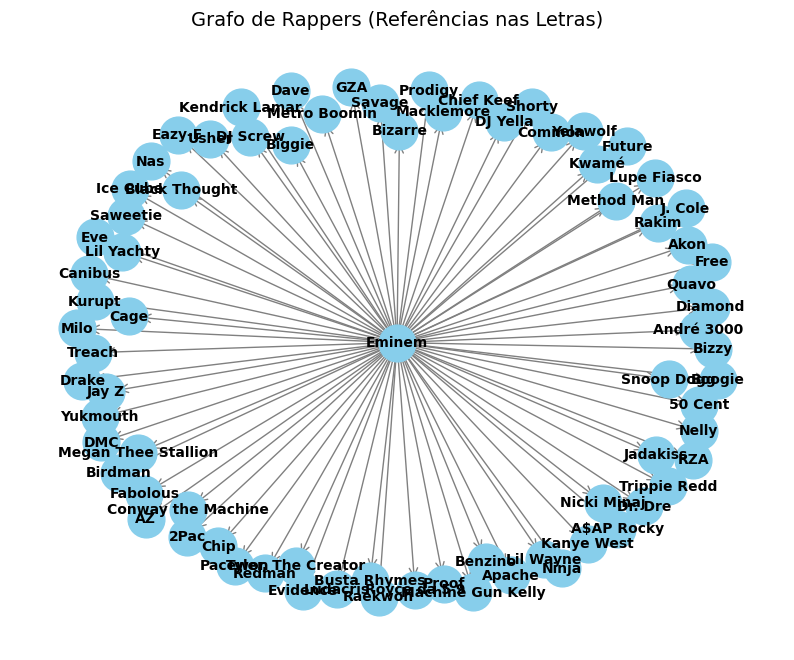

In [96]:
# Visualizando o grafo
plt.figure(figsize=(10, 8))

# Layout para o grafo
pos = nx.spring_layout(G, seed=42)  # Usando spring layout para melhor visualização

# Desenhando os nós e arestas
nx.draw_networkx_nodes(G, pos, node_size=700, node_color="skyblue")
nx.draw_networkx_edges(G, pos, arrowstyle="->", arrowsize=15, edge_color="gray")
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black", font_weight="bold")

# Exibindo o grafo
plt.title("Grafo de Rappers (Referências nas Letras)", fontsize=14)
plt.axis("off")
plt.show()
